In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import verde as vd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
data = pd.read_csv(r'../data/all_wells.csv')
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),name,cumulative production,well length (ft),frac stages,total proppant (lbs),total pump rate (cubic feet/min)
0,66100.0,22300.0,0.09,0.033,0.332,9440769.483,0.124740,0.875260,260036.414279,275.737593,Tarragon 4-119H,81324.0,9768.0,50.0,3.746894e+07,14418.10887
1,66199.0,22300.0,0.12,0.057,0.332,9429043.880,0.124979,0.875021,NaN,NaN,Tarragon 4-119H,81324.0,9768.0,50.0,3.746894e+07,14418.10887
2,66297.0,22300.0,0.11,0.050,0.332,9417413.010,0.125221,0.874779,429740.754787,324.145032,Tarragon 4-119H,81324.0,9768.0,50.0,3.746894e+07,14418.10887
3,66396.0,22300.0,0.08,0.024,0.332,9405879.454,0.125469,0.874531,NaN,NaN,Tarragon 4-119H,81324.0,9768.0,50.0,3.746894e+07,14418.10887
4,66495.0,22300.0,0.08,0.031,0.332,9394445.773,0.125720,0.874280,485657.822229,320.868488,Tarragon 4-119H,81324.0,9768.0,50.0,3.746894e+07,14418.10887


In [3]:
def mse_verde(model, test_x, test_y):
    predictions = model.predict((test_x['easting'], test_x['northing']))
    variance = np.var(test_y.values)
    mse = mean_squared_error(test_y.values, predictions)
    
    print(variance, mse)
    
    return mse

In [4]:
def model_porosity():
    features = data[['easting', 'northing', 'Young\'s Modulus', 'oil saturation', 'Poisson\'s ratio', 'porosity']].dropna()
    x = features[['easting', 'northing', 'Young\'s Modulus', 'oil saturation', 'Poisson\'s ratio']]
    y = features['porosity']
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.8, random_state=0)
    
    model = GradientBoostingRegressor()
    model.fit(train_x, train_y)
    
    print('Porosity Score', model.score(test_x, test_y))
    # print(model.feature_importances_)
    
    return model

In [5]:
def model_permeability():
    features = data[['easting', 'northing', 'Young\'s Modulus', 'oil saturation', 'Poisson\'s ratio', 'permeability']].dropna()
    x = features[['easting', 'northing', 'Young\'s Modulus', 'oil saturation', 'Poisson\'s ratio']]
    y = features['permeability']
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.8, random_state=0)
    
    model = GradientBoostingRegressor()
    model.fit(train_x, train_y)
    
    print('Permeability Score', model.score(test_x, test_y))
    # print(model.feature_importances_)
    
    return model

In [6]:
def model_youngs():
    features = data[['easting', 'northing', 'Young\'s Modulus']].dropna()
    x = features[['easting', 'northing']]
    y = features['Young\'s Modulus']
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.8, random_state=0)
    
    model = vd.Spline()
    model.fit((train_x['easting'], train_x['northing']), train_y)
    score = model.score((test_x['easting'], test_x['northing']), test_y)
    
    print('Young\'s Modulus Score', score)
    
    return model

In [7]:
def model_oil():
    features = data[['easting', 'northing', 'oil saturation']].dropna()
    x = features[['easting', 'northing']]
    y = features['oil saturation']
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.8, random_state=0)  
    
    model = vd.Spline()
    model.fit((train_x['easting'], train_x['northing']), train_y)
    score = model.score((test_x['easting'], test_x['northing']), test_y)
    
    print('Oil saturation Score', score)
    
    return model

In [8]:
def model_poissons():
    features = data[['easting', 'northing', 'Poisson\'s ratio']].dropna()
    x = features[['easting', 'northing']]
    y = features['Poisson\'s ratio']
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.8, random_state=0)
    
    model = vd.Spline()
    model.fit((train_x['easting'], train_x['northing']), train_y)
    score = model.score((test_x['easting'], test_x['northing']), test_y)
    
    print('Poisson\'s Ratio Score', score)
    
    return model

In [9]:
def model_cumulative_production():
    features = data[['porosity', 'permeability', 'Poisson\'s ratio', 'Young\'s Modulus', 'oil saturation', 'cumulative production']].dropna()
    x = data[['porosity', 'permeability', 'Poisson\'s ratio', 'Young\'s Modulus', 'oil saturation']]
    y = data[['cumulative production']]
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.8, random_state=0)
    model = RandomForestRegressor(criterion='mae', n_estimators=300)
    model.fit(train_x, train_y)
    
    print('Cumulative Production Score', model.score(test_x, test_y))
    print(model.feature_importances_)
    
    return model

In [73]:
def predict_and_plot(model, feature, precision=500):
    easting = data['easting']
    northing = data['northing']
    x = np.linspace(easting.min(), easting.max(), precision)
    y = np.linspace(northing.min(), northing.max(), precision)

    input_array = []

    print(x.shape, y.shape)
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            input_array.append((x[i], y[j]))

    predictions = model.predict(input_array)

    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.pcolormesh(predictions.reshape(precision, precision).T, vmin=data[feature].min(), vmax=data[feature].max())
    plt.colorbar()

In [11]:
def predict_and_plot_verde(spline, feature, spacing=100):
    easting = data['easting']
    northing = data['northing']
    
    grid_coords = vd.grid_coordinates(region=(easting.min(), easting.max(), northing.min(), northing.max()), spacing=spacing)
    gridded_scalars = spline.predict(grid_coords)

    plt.figure()
    plt.title(feature)
    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.pcolormesh(grid_coords[0], grid_coords[1], gridded_scalars)
    plt.colorbar()
    plt.show()

In [12]:
def predict_and_plot_second_layer(model, feature, poissons, youngs, oil, precision=500):
    predictors = data[['easting', 'northing']].dropna()
    easting = predictors['easting']
    northing = predictors['northing']
    x = np.linspace(easting.min(), easting.max(), precision)
    y = np.linspace(northing.min(), northing.max(), precision)

    input_array = []

    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            coords = (x[i], y[j])
            poissons_pred = poissons.predict(coords)
            youngs_pred = youngs.predict(coords)
            oil_pred = oil.predict(coords)
            input_array.append((x[i], y[j], poissons_pred, youngs_pred, oil_pred))
    
    predictions = model.predict(input_array)
    
    plt.title(feature)
    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.pcolormesh(predictions.reshape(precision, precision).T, vmin=data[feature].min(), vmax=data[feature].max())
    plt.colorbar()

In [48]:
def predict_and_plot_third_layer(model, feature, poissons, youngs, oil, porosity, permeability, precision=500):
    predictors = data[['easting', 'northing']].dropna()
    easting = predictors['easting']
    northing = predictors['northing']
    x = np.linspace(easting.min(), easting.max(), precision)
    y = np.linspace(northing.min(), northing.max(), precision)

    coords = []
    input_array = []

    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            zeroth_to_first = (x[i], y[j])
            poissons_pred = poissons.predict(zeroth_to_first)
            youngs_pred = youngs.predict(zeroth_to_first)
            oil_pred = oil.predict(zeroth_to_first)
            coords.append(zeroth_to_first)
            
            first_to_second = np.array((x[i], y[j], poissons_pred, youngs_pred, oil_pred)).reshape(1, -1)
            porosity_pred = porosity.predict(first_to_second)
            permeability_pred = permeability.predict(first_to_second)
            
            second_to_third = (porosity_pred, permeability_pred, poissons_pred, youngs_pred, oil_pred)
            input_array.append(second_to_third)
    
    predictions = model.predict(input_array)
    values = np.array([coords, input_array, predictions]).T
    values = sorted(values, key=lambda x: x[-1], reverse=True)
    
    plt.title(feature)
    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.pcolormesh(predictions.reshape(precision, precision).T)
    plt.colorbar()
    
    return values

Poisson's Ratio model has a score of ~1. Young's Modulus model has a score of ~1. Oil saturation model has a score of ~1. Porosity model has a score of ~0.704. Permeability model has a score of ~0.654. Cumulative production model has a score of ~0.873, basing its predictions ~10% on porosity, ~14% on permeability, ~25% on Poisson's Ratio, ~25% on Young's Modulus, and ~25% on oil saturation. This gives a cumulative score of ~0.80 for the entire model pipeline.

In [16]:
poissons_model = model_poissons()
youngs_model = model_youngs()
oil_model = model_oil()

porosity_model = model_porosity()
permeability_model = model_permeability()

cumulative_production_model = model_cumulative_production()

Poisson's Ratio Score 0.9996351174006647
Young's Modulus Score 0.9999833791582605
Oil saturation Score 0.9999916751175368
Porosity Score 0.704383594807489
Permeability Score 0.6547348997577781


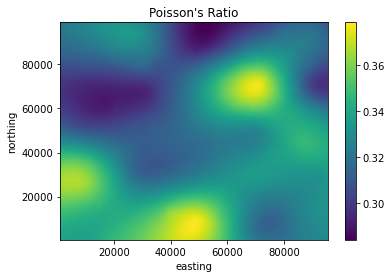

In [74]:
predict_and_plot_verde(poissons_model, 'Poisson\'s Ratio')

In [ ]:
predict_and_plot_verde(youngs_model, 'Young\'s Modulus')

In [ ]:
predict_and_plot_verde(oil_model, 'oil saturation')

In [ ]:
predict_and_plot_second_layer(permeability_model, 'permeability', poissons_model, youngs_model, oil_model, precision=300)

In [ ]:
predict_and_plot_second_layer(porosity_model, 'porosity', poissons_model, youngs_model, oil_model, precision=300)

<ipython-input-48-03bf9715d6eb>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([coords, input_array, predictions]).T


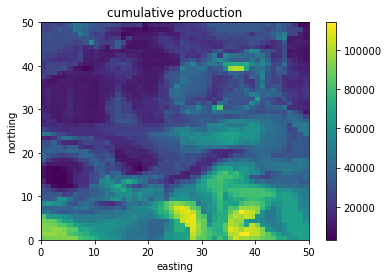

In [49]:
values = predict_and_plot_third_layer(cumulative_production_model, 'cumulative production', poissons_model, youngs_model, oil_model, porosity_model, permeability_model, precision=50)

In [77]:
prospective_sites = pd.DataFrame()

easting = []
northing = []
porosity = []
permeability = []
poissons = []
youngs = []
oil = []
production = []

for i in range(len(values)):
    well = values[i]
    coords = well[0]
    features = well[1]
    predicted_production = well[2]
    
    easting.append(coords[0])
    northing.append(coords[1])
    porosity.append(features[0][0])
    permeability.append(features[1][0])
    poissons.append(features[2])
    youngs.append(features[3])
    oil.append(features[4])
    production.append(predicted_production)

prospective_sites['easting'] = easting
prospective_sites['northing'] = northing
prospective_sites['porosity'] = porosity
prospective_sites['permeability'] = permeability
prospective_sites['poissons'] = poissons
prospective_sites['youngs'] = youngs
prospective_sites['oil'] = oil
prospective_sites['production'] = production

prospective_sites.to_csv('../data/prospective_wells.csv', index=False)
prospective_sites.head(10)

,easting,northing,porosity,permeability,poissons,youngs,oil,production
0,72297.816327,12485.714286,0.098456,0.035435,0.3173515916977467,9350633.31056846,0.8129606727045982,114138.486667
1,74222.081633,2414.285714,0.095731,0.032830,0.3158395189668491,9235678.47659731,0.8140138622940555,113426.440000
2,72297.816327,2414.285714,0.097934,0.034673,0.3180491145498104,9511530.614582743,0.8250211720254855,112740.413333
3,54979.428571,10471.428571,0.096653,0.035101,0.3635714957040707,11197246.074891435,0.959432299360521,109864.663333
4,53055.163265,12485.714286,0.095587,0.031729,0.36585684505067084,11225832.943530997,0.9636181017627475,109809.210000
5,51130.897959,14500.000000,0.095587,0.030550,0.3646156259474069,11175526.419091752,0.9579103812189949,109430.050000
6,54979.428571,8457.142857,0.096219,0.035101,0.3649378165118257,11246734.639161715,0.9698979213607899,109021.450000
7,68449.285714,4428.571429,0.098022,0.037168,0.3219539857624764,10001544.856099464,0.8454574458038467,108757.340000
8,54979.428571,4428.571429,0.096219,0.035075,0.364516927053671,11258932.145353878,0.9861678980324375,108320.583333
9,54979.428571,6442.857143,0.096219,0.035075,0.36526555637767527,11264628.075325407,0.978960015398571,108320.013333
